Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = "James Shen"

# Assignment 2 - Time Series Analysis
**(30 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. You will use the Yahoo Finance library. To install it, you will need to run this code: pip install yfinance

2. *(4 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. 

3. *(6 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(6 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(8 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(6 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `yfinance`.

---------

### Import all the relevant libraries and follow the examples below for importing data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import itertools as iter

In [3]:
# 1. Setup your environment to access and download latest stock data. 
#    You will use the Yahoo Finance library. 
#    To install it, you will need to run this code: pip install yfinance
#
# 2. (4 points) Download the adjusted close prices for FB, MMM, IBM and AMZN for the last 60 months.
#
start = '2018-02-17'; end = '2023-02-17';

In [4]:
# Option 1) Using pandas datareader and Yahoo Finance
# import pandas_datareader as pdr
# import yfinance as yf
# yf.pdr_override()
# amzn = pdr.data.get_data_yahoo('AMZN', start=start, end=end)

In [5]:
# Option 2) Using yfinance library only to download AMZN data
# import yfinance as yf
# amzn = yf.download('AMZN', start=start, end=end)

In [6]:
#  If we want to download multipe stocks into a single dataframe:
#  (FB is delisted and is substituted by 'META')
#
all_stocks_list = ['AMZN', 'IBM', 'META', 'MMM']
#all_stocks = yf.download(all_stocks_list, start=start, end=end)

# Comments: The above code actually worked very well. Instead of using the 4 csv files 
#           provided rather than to download them every time, I comment the above code.

In [7]:
## TYPE YOUE CODE BELOW

In [8]:
#  To use the 4 csv files in code below, I need to turn column 'Date' as index, rename column
#  'Adj Close' to stock name, and change the string index to datetime index.
#
amzn = pd.read_csv('amzn.csv')
amzn = amzn.set_index('Date')
amzn = amzn.rename(columns={'Adj Close':'AMZN'})

ibm = pd.read_csv('ibm.csv')
ibm = ibm.set_index('Date')
ibm = ibm.rename(columns={'Adj Close':'IBM'})

meta = pd.read_csv('meta.csv')
meta = meta.set_index('Date')
meta = meta.rename(columns={'Adj Close':'META'})

mmm = pd.read_csv('mmm.csv')
mmm = mmm.set_index('Date')
mmm = mmm.rename(columns={'Adj Close':'MMM'})

df = pd.concat([amzn, ibm, meta, mmm], axis=1)
df.index = pd.to_datetime(df.index)
df = df[start:end]

In [9]:
# 2. (4 points) Download the adjusted close prices for FB, MMM, IBM and AMZN for the last 60 months.
#
#  (FB is delisted and is substituted by 'META')
#
#df = all_stocks['Adj Close']
df

,AMZN,IBM,META,MMM
Date,,,,
2018-02-20,73.417503,116.440231,176.009995,197.148087
2018-02-21,74.146004,115.539703,177.910004,194.724289
2018-02-22,74.266998,114.954361,178.990005,197.928040
2018-02-23,75.000000,116.710411,183.289993,198.783493
2018-02-26,76.097504,119.006798,184.929993,204.754898
...,...,...,...,...
2023-02-13,99.540001,137.350006,179.429993,113.773590
2023-02-14,99.699997,136.009995,179.479996,112.717575
2023-02-15,101.160004,136.399994,177.160004,113.290001


In [10]:
# 3. (6 points) Resample the data to get prices for the end of the business month. 
#  Select the Adjusted Close for each stock.
#
bm_end = df.resample('BM').last()
bm_end

,AMZN,IBM,META,MMM
Date,,,,
2018-02-28,75.622498,116.943008,178.320007,197.517059
2018-03-30,72.366997,115.141968,159.789993,184.106628
2018-04-30,78.306503,108.785622,172.000000,163.030624
2018-05-31,81.481003,107.223671,191.779999,166.543808
2018-06-29,84.989998,106.002029,194.320007,166.113144
...,...,...,...,...
2022-10-31,102.440002,135.002350,93.160004,122.709427
2022-11-30,96.540001,147.093216,118.099998,124.323906
2022-12-30,84.000000,139.180420,120.339996,118.352959


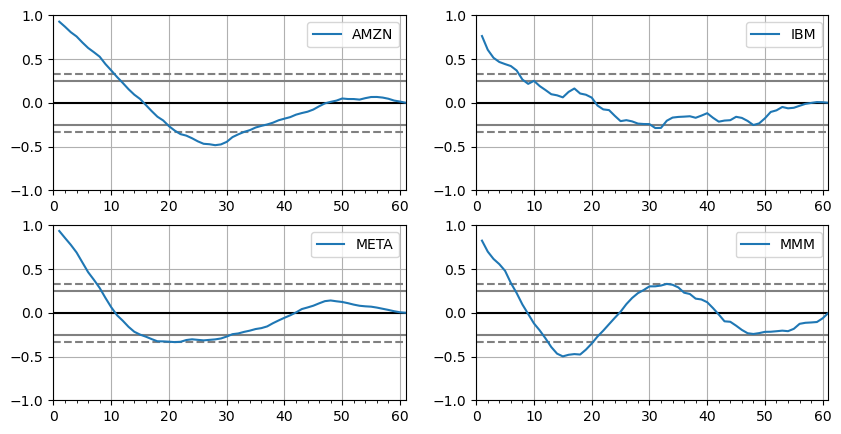

In [11]:
# 4. (6 points) Use the pandas autocorrelation_plot() function to plot the autocorrelation 
#  of the adjusted month-end close prices for each of the stocks.
#
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize = [10,5]);
all_ax = [ax1, ax2, ax3, ax4];
idx = 0;

for stock in all_stocks_list:
    pd.plotting.autocorrelation_plot(bm_end[stock], ax=all_ax[idx], label=stock);
    all_ax[idx].set_ylim([-1,1]);
    all_ax[idx].set_xlim([0,61]);
    all_ax[idx].minorticks_on()
    all_ax[idx].yaxis.set_tick_params(which='minor', left=False)
    all_ax[idx].set_xlabel('');
    all_ax[idx].set_ylabel('');
    idx += 1;

**Are they autocorrelated?**

- Yes. All 4 stocks are autocorelated at the beginning, because their autocorrelation plot are well above the confidence bands at the beginning. However, the autocorrelation value diminished later, which means that all 4 stocks are no longer autocorelated later, and they become white noises.

**Provide short explanation.**

1. AMZN: First 10-month has trend
2. IBM: First 7-month has trend
3. META: First 7-month has trend
4. MMM: First 6-month has trend


In [12]:
# 5. (8 points)

#  Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using shift() function.
#
bm_end_lastmonth = bm_end.shift(1)
MR_percent = 100 * ( (bm_end - bm_end_lastmonth) / bm_end_lastmonth )
MR_percent

,AMZN,IBM,META,MMM
Date,,,,
2018-02-28,NaN,NaN,NaN,NaN
2018-03-30,-4.304937,-1.540101,-10.391439,-6.789505
2018-04-30,8.207480,-5.520443,7.641284,-11.447716
2018-05-31,4.053941,-1.435806,11.499999,2.154922
2018-06-29,4.306519,-1.139339,1.324439,-0.258589
...,...,...,...,...
2022-10-31,-9.345131,16.395920,-31.338437,13.837112
2022-11-30,-5.759470,8.956041,26.771140,1.315693
2022-12-30,-12.989435,-5.379443,1.896696,-4.802735


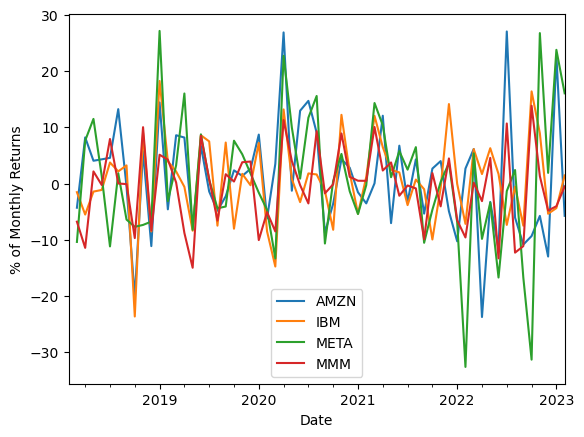

In [13]:
#  Plot the monthly returns for each stock
#
MR_percent.plot()
plt.ylabel('% of Monthly Returns');

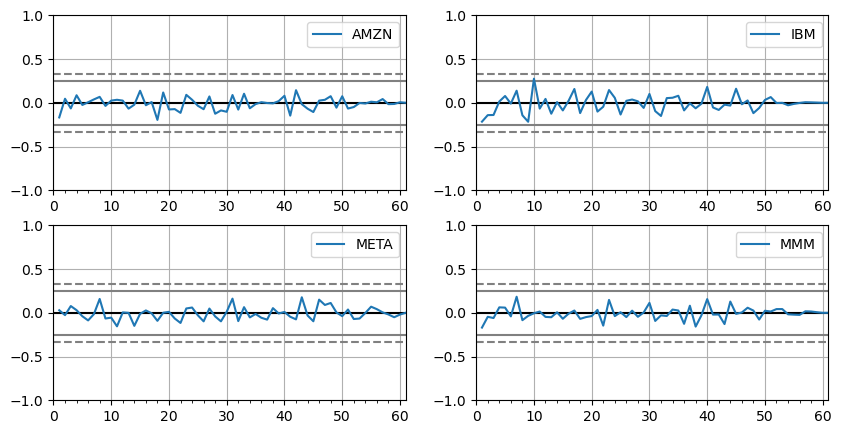

In [14]:
#  Use pandas autocorrelation_plot() to plot the autocorrelation of the monthly returns.
#
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize = [10,5]);
all_ax = [ax1, ax2, ax3, ax4];
idx = 0;

for stock in all_stocks_list:
    
    #  Any NAs must be imputed before plotting autocorrelations;
    #  otherwise,it only produce empty plots.
    #
    pd.plotting.autocorrelation_plot(MR_percent[stock].bfill(), ax=all_ax[idx], label=stock);
    all_ax[idx].set_ylim([-1,1]);
    all_ax[idx].set_xlim([0,61]);
    all_ax[idx].minorticks_on()
    all_ax[idx].yaxis.set_tick_params(which='minor', left=False)
    all_ax[idx].set_xlabel('');
    all_ax[idx].set_ylabel('');
    idx += 1;

**Are the returns autocorrelated? Provide short explanation.**

No. None of the monthly returns are autocorelated and they are just white noises, because their autocorrelation plot are within the confidence bands.

In [15]:
# (6 points)

# Combine all 4 time series (returns) into a single DataFrame,
#
#  Any NAs must be imputed before plotting scatter matrix;
#
df = MR_percent.bfill()
df

,AMZN,IBM,META,MMM
Date,,,,
2018-02-28,-4.304937,-1.540101,-10.391439,-6.789505
2018-03-30,-4.304937,-1.540101,-10.391439,-6.789505
2018-04-30,8.207480,-5.520443,7.641284,-11.447716
2018-05-31,4.053941,-1.435806,11.499999,2.154922
2018-06-29,4.306519,-1.139339,1.324439,-0.258589
...,...,...,...,...
2022-10-31,-9.345131,16.395920,-31.338437,13.837112
2022-11-30,-5.759470,8.956041,26.771140,1.315693
2022-12-30,-12.989435,-5.379443,1.896696,-4.802735


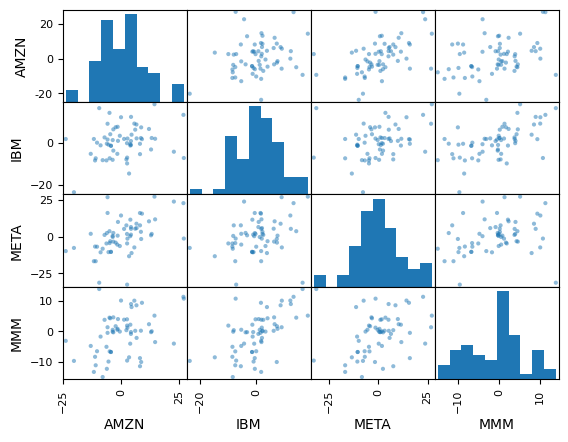

In [16]:
# Visualize the correlation between the returns of all pairs of stocks 
# using a scatter plot matrix 
# (use scatter_matrix() function from pandas.plotting).
#
pd.plotting.scatter_matrix(df);

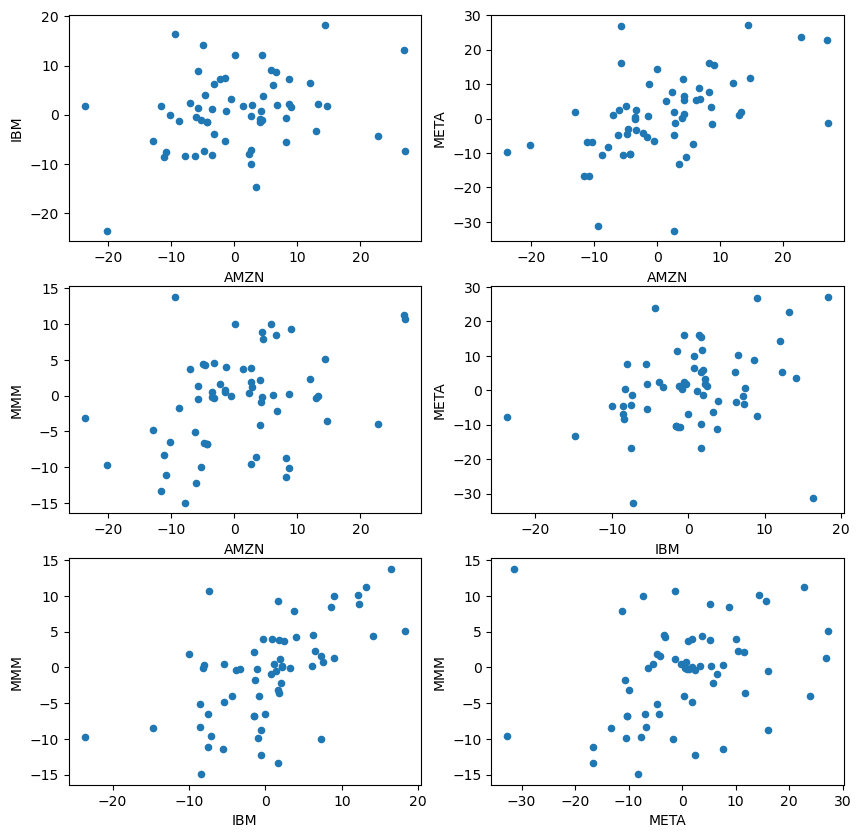

In [17]:
# We can also visualize the correlation between the returns of all pairs of stocks 
# using the regular scatter plot
#
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2, figsize = [10,10]);
all_ax = [ax1, ax2, ax3, ax4, ax5, ax6];
idx = 0;

stock_pair_list = list(iter.combinations([0,1,2,3], 2))

for stock_pair in stock_pair_list:    
    df.plot(ax=all_ax[idx], kind='scatter', \
                    x=all_stocks_list[stock_pair[0]], \
                    y=all_stocks_list[stock_pair[1]]);
    idx += 1;

In [18]:
#  Pearson correlation coefficient between the returns of all pairs of stocks
#
df.corr()

,AMZN,IBM,META,MMM
AMZN,1.000000,0.241088,0.501219,0.369303
IBM,0.241088,1.000000,0.310784,0.597744
META,0.501219,0.310784,1.000000,0.295313
MMM,0.369303,0.597744,0.295313,1.000000


**Explain the results. Is there any correlation?**

Since the Pearson correlation coefficient is not close to 0, they do have a some sorts of correlation, esp. between IBM & MMM. However, they are far from 1, which means that they do not have strong correlation. This can also be verified by the scatter plots above.